In [115]:
import math
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [116]:
X = (np.load("../BIO_Ml/GSE52588/GSE52588_beta_fn.npz"))["X"]
data = pd.read_csv("../BIO_Ml/GSE52588/GSE52588_samples.csv", delim_whitespace=True)
names = pd.read_csv("../BIO_Ml/GSE52588/cpgs_annotations.csv")
names = names["UCSC_REFGENE_NAME"]
names = names.replace(np.nan, "0")

In [117]:
y = data["age"]
y = y.to_numpy()
X = Normalizer().fit_transform(X)

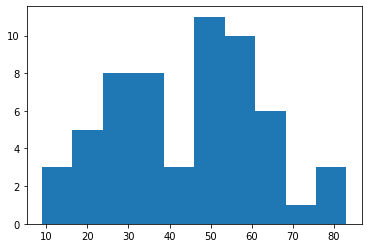

In [118]:
y = y[29:]
X = X[29:]
plt.hist(y)
plt.show()


In [119]:
test1 = SelectKBest(score_func=chi2, k=10000)
fit = test1.fit(X, y)
X = fit.transform(X)

In [120]:
runs = 5
important_features = [[] for i in range(runs)]

selector = RandomForestRegressor(n_estimators=30, criterion="absolute_error", random_state=42)
for i in range(runs):
    model = selector.fit(X, y)
    importances = model.feature_importances_

    for j in range(len(importances)):
        important_features[i].append(list(importances).index(importances[j])) if importances[j] > 0 else 0

In [121]:
for i in range(len(important_features) - 1):
    if i != 0:
         importances = set.intersection(*map(set, important_features))

importances = list(importances)
X = X[..., importances]

In [122]:
#ax.scatter(y[1:], X[1:,0])
#ax.scatter(y[0:1], X[0:1,0])
#for i in range(5):
#    ax.scatter(y, X[:,i])

feature = 1
ox = y
oy = X[:, feature]

C:\Users\Eugen\AppData\Local\Temp/ipykernel_10396/2117182321.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
C:\Users\Eugen\AppData\Local\Temp/ipykernel_10396/2117182321.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


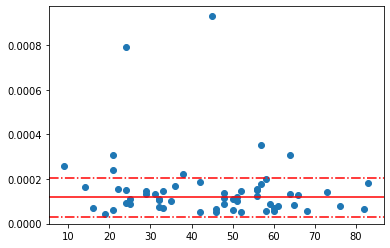

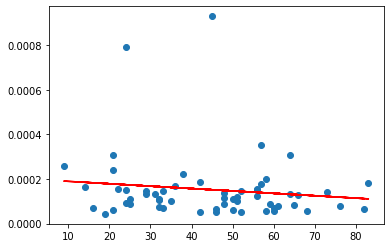

In [123]:
fig1 = plt.figure()
ax = plt.axes()

ax.scatter(ox, oy)
median = np.median(oy)
ax.axhline(median, c="r")
ax.axhline((median - (0.1 * (max(oy - min(oy))))), c="r", linestyle="-.")
ax.axhline((median + (0.1 * (max(oy - min(oy))))), c="r", linestyle="-.")
fig1.show()

fig2 = plt.figure()
ax = plt.axes()
ax.plot(ox, oy, 'o')
m, b = np.polyfit(ox, oy, 1)
ax.plot(ox, m * ox + b, c="r")

fig2.show()

In [124]:
#names = names[importances]
#names = names.drop_duplicates()
#print(names)
#names.to_excel("../BIO_Ml/GSE52588/gene_names_CpG_based.xlsx")

6                 ATP2A1;ATP2A1
25                            0
8223                  BCOR;BCOR
8228           TAF1;BCYRN1;TAF1
38                         ETV6
                 ...           
4039                       BAT2
6105                       SDK2
8153                       PTH2
6107                CNIH3;CNIH3
8182    CASS4;CASS4;CASS4;CASS4
Name: UCSC_REFGENE_NAME, Length: 330, dtype: object


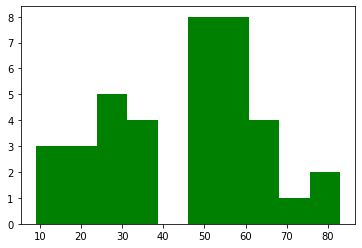

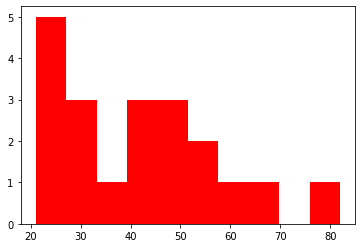

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.hist(y_train, color='g')
plt.show()
plt.hist(y_test, color="r")
plt.show()

In [126]:
regressor = RandomForestRegressor(n_estimators=42, criterion="absolute_error", random_state=42)
#regressor = LinearRegression()
#regressor = SVR(kernel="poly", C = 1.5)
model = regressor.fit(X_train, y_train)

In [127]:
y_pred = regressor.predict(X_test)
res = pd.DataFrame({"Actual": y_test, "Predicted": y_pred,
                    "AE": y_test - y_pred,
                    "SE": (y_test - y_pred) ** 2})
print("MAE: ", mean_absolute_error(y_test, y_pred), "MSE: ", mean_squared_error(y_test, y_pred))
print(res)

MAE:  4.7 MSE:  37.82069160997732
    Actual  Predicted         AE          SE
0       21  26.095238  -5.095238   25.961451
1       24  24.214286  -0.214286    0.045918
2       56  61.595238  -5.595238   31.306689
3       36  27.261905   8.738095   76.354308
4       46  46.214286  -0.214286    0.045918
5       61  61.880952  -0.880952    0.776077
6       64  57.523810   6.476190   41.941043
7       33  29.809524   3.190476   10.179138
8       45  40.071429   4.928571   24.290816
9       32  26.071429   5.928571   35.147959
10      82  67.071429  14.928571  222.862245
11      21  20.333333   0.666667    0.444444
12      51  60.285714  -9.285714   86.224490
13      42  49.690476  -7.690476   59.143424
14      33  24.714286   8.285714   68.653061
15      24  24.571429  -0.571429    0.326531
16      25  22.523810   2.476190    6.131519
17      42  41.785714   0.214286    0.045918
18      56  56.476190  -0.476190    0.226757
19      48  56.142857  -8.142857   66.306122


C:\Users\Eugen\AppData\Local\Temp/ipykernel_10396/3353738117.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_pred, "bo-", c="r")
C:\Users\Eugen\AppData\Local\Temp/ipykernel_10396/3353738117.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_test, "bo-", c="g")


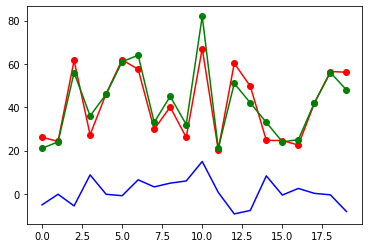

In [128]:
plt.plot(y_pred, "bo-", c="r")
plt.plot(y_test, "bo-", c="g")
plt.plot(y_test - y_pred, c="b")
plt.show()